
# Time Series Analysis - Store Sales

When working with Time Series project there's 'Analysis' and there's 'Prediction'. For this notebook we will begin with a in-depth analysis, allowing us to gather greater insights that will aide us in our prediction.

Time series provides many optional methods relative to forecasting, in addition to methods such as exponential smoothing, the Box-Jenkins ARIMA method could provide greater levels of accuracy; however, the observations will not exceed an 18-month period. 

The interval of years we will examine are from 2013 - 2017.<br>
Prediction range will be for 3, 6, and 12 months into 2018.

In [146]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
# Remove before finalize
train = pd.read_csv('/Users/jasonrobinson/Downloads/store_sales_clean/train_data_cleaned.csv', parse_dates=True, index_col="date")
test = pd.read_csv('/Users/jasonrobinson/Downloads/store_sales_clean/test_data_cleaned.csv', parse_dates=True, index_col="date")

In [ ]:
train = pd.read_csv('../store_sales_clean/train_data_cleaned.csv', parse_dates=True, index_col="date")
test = pd.read_csv(' ../store_sales_clean/test_data_cleaned.csv', parse_dates=True, index_col="date")

In [148]:
train.head(2)

,store_nbr,family,sales,onpromotion,city,type_of_store,cluster,dcoilwtico,transactions,n_holidays
date,,,,,,,,,,
2013-01-01,1,Others,0.0,0,Quito,D,13,93.14,NaN,1.0
2013-01-01,1,Others,0.0,0,Quito,D,13,93.14,NaN,1.0


In [149]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3000888 entries, 2013-01-01 to 2017-08-15
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   store_nbr      int64  
 1   family         object 
 2   sales          float64
 3   onpromotion    int64  
 4   city           object 
 5   type_of_store  object 
 6   cluster        int64  
 7   dcoilwtico     float64
 8   transactions   float64
 9   n_holidays     float64
dtypes: float64(4), int64(3), object(3)
memory usage: 251.8+ MB


In [150]:
train.index

DatetimeIndex(['2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01',
               ...
               '2017-08-15', '2017-08-15', '2017-08-15', '2017-08-15',
               '2017-08-15', '2017-08-15', '2017-08-15', '2017-08-15',
               '2017-08-15', '2017-08-15'],
              dtype='datetime64[ns]', name='date', length=3000888, freq=None)

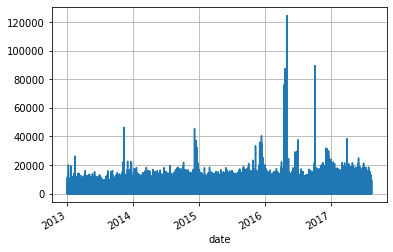

In [151]:
train['sales'].plot(grid=True);

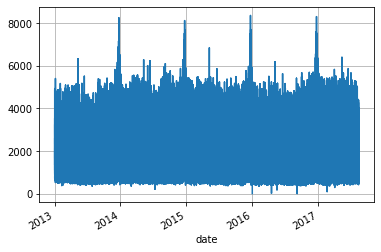

In [152]:
# Transactions looks to contain seasonality (suppose consistency in sales is related to the holidays)
train['transactions'].plot(grid=True);

In [153]:
#train['store_nbr'].unique()

In [154]:
train.describe()

,store_nbr,sales,onpromotion,cluster,dcoilwtico,transactions,n_holidays
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,2.143746e+06,2.755104e+06,3.000888e+06
mean,2.750000e+01,3.577757e+02,2.602770e+00,8.481481e+00,6.788783e+01,1.694602e+03,1.662708e-01
std,1.558579e+01,1.101998e+03,1.221888e+01,4.649735e+00,2.566954e+01,9.632810e+02,4.202733e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.619000e+01,5.000000e+00,0.000000e+00
25%,1.400000e+01,0.000000e+00,0.000000e+00,4.000000e+00,4.640000e+01,1.046000e+03,0.000000e+00
50%,2.750000e+01,1.100000e+01,0.000000e+00,8.500000e+00,5.330000e+01,1.393000e+03,0.000000e+00
75%,4.100000e+01,1.958473e+02,0.000000e+00,1.300000e+01,9.578000e+01,2.079000e+03,0.000000e+00
max,5.400000e+01,1.247170e+05,7.410000e+02,1.700000e+01,1.106200e+02,8.359000e+03,3.000000e+00


In [155]:
# ni stands for non-indexed
train_ni = train.copy

In [156]:
# 18-months
month_18 = train.loc['2016-02-15':'2017-08-15']
#print("All Sales for 18-month period", month_18)

In [157]:
train['sales'][1000000:-1]

date
2014-07-17       0.000
2014-07-17       4.000
2014-07-17    1711.000
2014-07-17       0.000
2014-07-17     736.000
                ...   
2017-08-15       6.000
2017-08-15     438.133
2017-08-15     154.553
2017-08-15    2419.729
2017-08-15     121.000
Name: sales, Length: 2000887, dtype: float64

In [158]:
targ_sales = train['sales']
targ_sales.head()

date
2013-01-01    0.0
2013-01-01    0.0
2013-01-01    0.0
2013-01-01    0.0
2013-01-01    0.0
Name: sales, dtype: float64

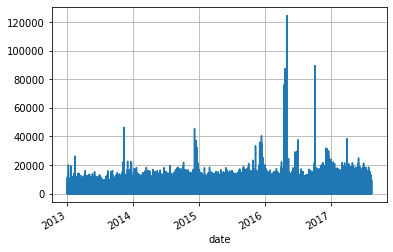

In [159]:
targ_sales.plot(grid=True);

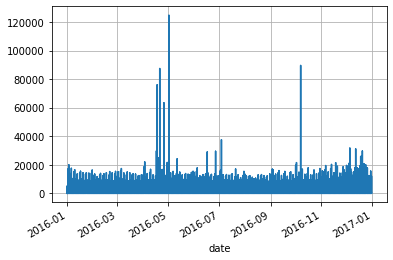

In [160]:
train_2016 = train.loc['2016']
targ_sales_2016 = train_2016['sales']
targ_sales_2016.plot(grid=True);

In [162]:
#fig = px.line(train_ni, x='date', y='sales', title='Targeted Sales for 18-month period')
#fig.update_xaxes(rangeslider_visible=True)
#fig.show()

In [163]:
#df_2015 = train['2015'].reset_index()
#
#df_2015['month_day_hour'] = df_2015.apply(lambda x: str(x['date']) + "-" + x['day'], axis=1)
#
#plt.plot(df_2015['month_day_hour'], df_2015['targeted_productivity'])
#plt.legend(['2015'])
#plt.xlabel('date')
#plt.ylabel('targeted_productivity')
#plt.title('Targeted Productivitu plot for year 2015')

In [164]:
train['2014':'2016'][['transactions', 'sales']].groupby('date').describe()

transactions                                                    \
                  count         mean          std     min     25%     50%   
date                                                                        
2014-01-01         66.0   663.500000   177.852510   487.0   487.0   663.5   
2014-01-02       1518.0  1972.086957   988.131698   731.0  1309.0  1612.0   
2014-01-03       1551.0  1797.617021   932.727848   613.0  1162.0  1534.0   
2014-01-04       1551.0  2156.617021  1278.393232   691.0  1303.0  1783.0   
2014-01-05       1551.0  1988.829787  1268.981616   489.0  1135.0  1523.0   
...                 ...          ...          ...     ...     ...     ...   
2016-12-27       1749.0  1804.584906  1004.207708   614.0  1161.0  1516.0   
2016-12-28       1749.0  1956.924528  1146.484873   649.0  1244.0  1573.0   
2016-12-29       1749.0  1937.075472  1063.053156   715.0  1263.0  1587.0   
2016-12-30       1749.0  2410.773585  1378.850302   833.0  1497.0  2011.0   
2016-12-31       1749.0  2557.886792  1118.198292  1106.0  1647.0  2327.0   

                             sales                                           \
               75%     max   count        mean          std  min  25%   50%   
date                                                                          
2014-01-01   840.0   840.0  1782.0    4.827197    57.999269  0.0  0.0   0.0   
2014-01-02  2472.0  4422.0  1782.0  449.501249  1266.400680  0.0  0.0  12.0   
2014-01-03  2366.0  4167.0  1782.0  381.971294  1078.639145  0.0  0.0  11.0   
2014-01-04  2643.0  5600.0  1782.0  525.605436  1560.349060  0.0  0.0  16.0   
2014-01-05  2569.0  5234.0  1782.0  532.894943  1635.622501  0.0  0.0  12.0   
...            ...     ...     ...         ...          ...  ...  ...   ...   
2016-12-27  2036.0  4675.0  1782.0  472.769635  1217.805734  0.0  3.0  29.0   
2016-12-28  2247.0  5196.0  1782.0  533.969536  1407.395598  0.0  3.0  34.0   
2016-12-29  2147.0  4802.0  1782.0  501.744241  1281.960017  0.0  3.0  35.0   
2016-12-30  2860.0  6360.0  1782.0  652.998338  1685.152146  0.0  4.0  42.0   
2016-12-31  3067.0  5598.0  1782.0  622.341645  1522.987793  0.0  4.0  45.0   

                                   
                   75%        max  
date                               
2014-01-01    0.000000   1415.000  
2014-01-02  252.040725  12497.307  
2014-01-03  205.796750  10556.201  
2014-01-04  284.500000  15228.257  
2014-01-05  261.000000  17056.812  
...                ...        ...  
2016-12-27  306.750000  11607.000  
2016-12-28  336.000000  12436.000  
2016-12-29  345.500000  11858.000  
2016-12-30  440.491250  15592.000  
2016-12-31  430.666000  12033.000  

[1093 rows x 16 columns]

In [165]:
train['sales'].min(), train['sales'].max()

(0.0, 124717.0)

In [166]:
X_train = train.index
X_train

DatetimeIndex(['2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01',
               ...
               '2017-08-15', '2017-08-15', '2017-08-15', '2017-08-15',
               '2017-08-15', '2017-08-15', '2017-08-15', '2017-08-15',
               '2017-08-15', '2017-08-15'],
              dtype='datetime64[ns]', name='date', length=3000888, freq=None)

In [167]:
# Bi-variate analysis
train['2014':'2016'][['n_holidays', 'sales', 'transactions']].groupby('sales').agg({'sales':['max'], 'transactions':['min', 'max']})

sales transactions        
                     max          min     max
sales                                        
0.0000            0.0000          5.0  8359.0
0.1880            0.1880       1378.0  1378.0
0.1923            0.1923       1070.0  1070.0
0.1960            0.1960       1454.0  1454.0
0.1980            0.1980        983.0   983.0
...                  ...          ...     ...
63434.0000    63434.0000       1778.0  1778.0
76090.0000    76090.0000       3895.0  3895.0
87438.5160    87438.5160       1692.0  1692.0
89576.3600    89576.3600       1295.0  1295.0
124717.0000  124717.0000       1905.0  1905.0

[278986 rows x 3 columns]

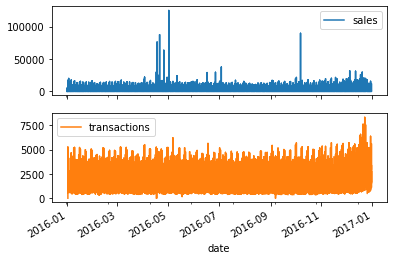

In [168]:
train_2016 = train['2016']
train_product_2016 = train_2016[['sales', 'transactions']]
train_product_2016.plot(subplots=True);

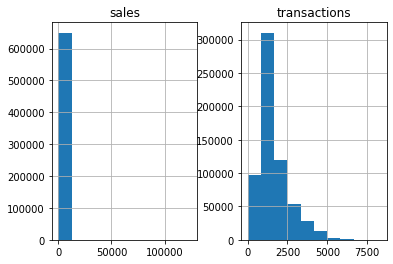

In [169]:
train_2016[['sales', 'transactions']].hist();

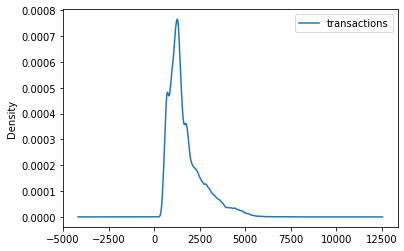

In [170]:
train[['transactions']].plot(kind='density');

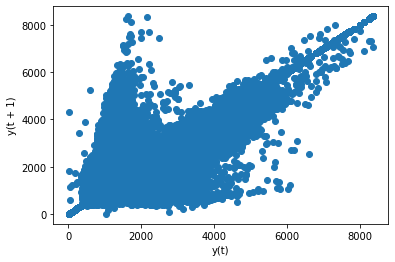

In [171]:
pd.plotting.lag_plot(train['transactions'], lag=1);

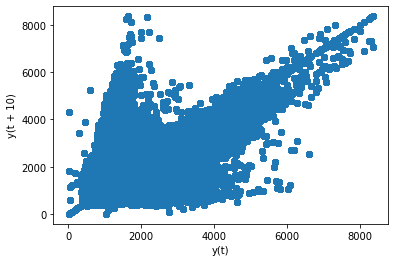

In [172]:
pd.plotting.lag_plot(train['transactions'], lag=10);

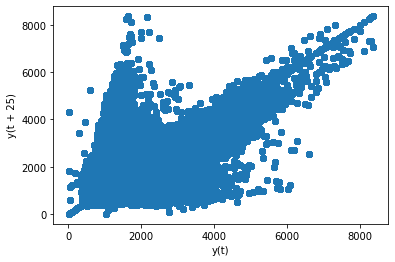

In [173]:
pd.plotting.lag_plot(train['transactions'], lag=25);

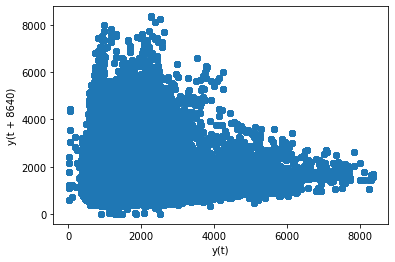

In [174]:
pd.plotting.lag_plot(train['transactions'], lag=8640);

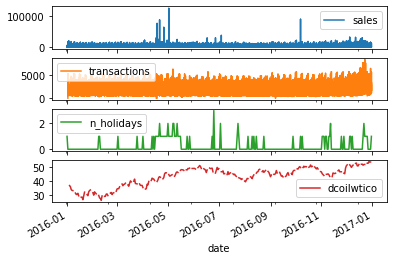

In [175]:
train_2016 = train['2016']
train_product_2016 = train_2016[['sales', 'transactions', 'n_holidays', 'dcoilwtico']]
train_product_2016.plot(subplots=True);

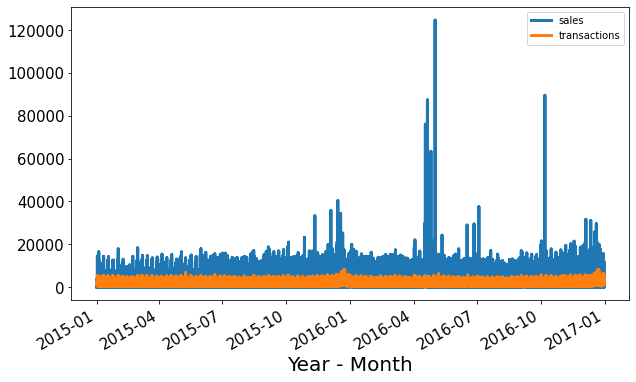

In [176]:

train['2015':'2016'][['sales', 'transactions']].plot(figsize=(10,6), linewidth=3, fontsize=15)
plt.xlabel('Year - Month', fontsize=20);

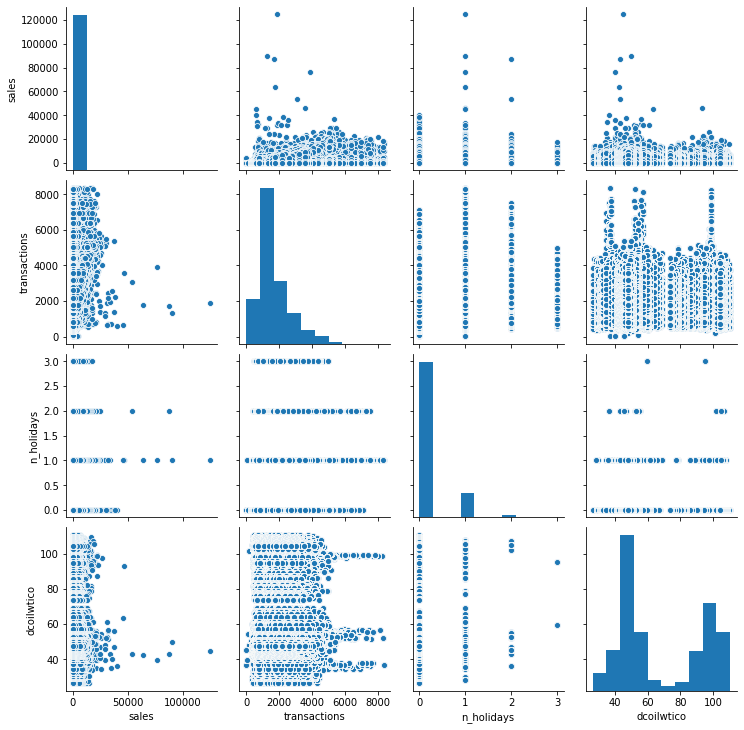

In [177]:
g = sns.pairplot(train[['sales', 'transactions', 'n_holidays', 'dcoilwtico']])

In [178]:
train_corr = train[['sales', 'transactions', 'n_holidays', 'dcoilwtico']].corr(method='pearson')
train_corr

,sales,transactions,n_holidays,dcoilwtico
sales,1.000000,0.214815,0.013455,-0.078885
transactions,0.214815,1.000000,0.043061,0.021867
n_holidays,0.013455,0.043061,1.000000,-0.051823
dcoilwtico,-0.078885,0.021867,-0.051823,1.000000


In [179]:
#train.groupby('n_holidays').agg(median=('sales', 'median'), mean=('sales', 'mean'), max=('sales', 'max'), min=('sales', 'min')).reset_index()

In [180]:
train_na = train.copy()
train_na = train_na.dropna()

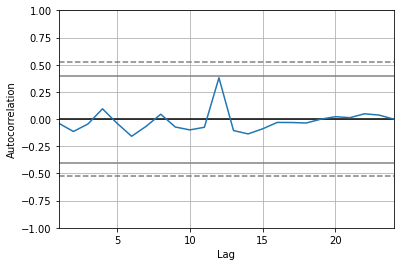

In [181]:
pd.plotting.autocorrelation_plot(train_na['2015':'2016']['transactions'].resample('1m').mean());

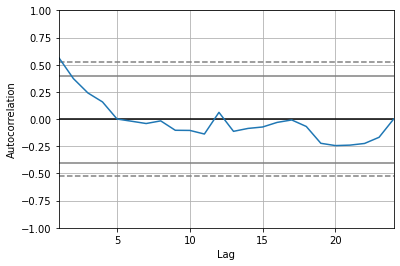

In [182]:
pd.plotting.autocorrelation_plot(train_na['2015':'2016']['sales'].resample('1m').mean());